1. Input points 

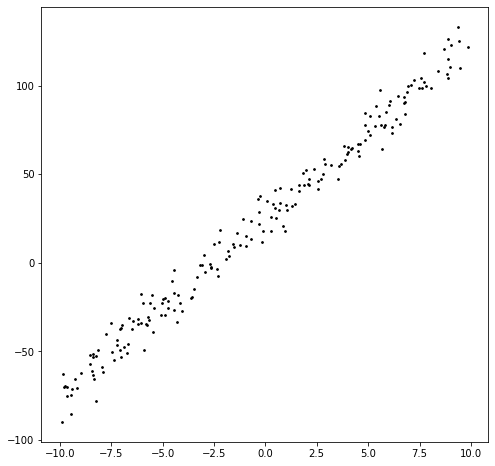

In [4]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color='k',s=3)
plt.show()

In [5]:
theta = np.random.randn(1,2)
obj = []
a= []
b= []
for i in range(1000):
    a.append(theta[0,0])
    b.append(theta[0,1])
    y_pred=theta[0,0]*x+theta[0,1]
    obj.append((1/(2*300))*(np.sum((y_pred-y)**2)))
    theta[0,0]= theta[0,0]-(0.01/300)*(np.sum((y_pred-y)*x))
    theta[0,1]= theta[0,1]-(0.01/300)*(np.sum((y_pred-y)))


plt.figure(figsize=(7, 7))
plt.axvline(x=0, color = 'r',linestyle=':')
plt.axhline(y=0, color = 'r',linestyle=':')
plt.title("assignment2-2")
plt.xlabel('X')
plt.ylabel('Y')
t1 = np.arange(-5.0, 5.0, 0.01)
plt.scatter(x,y,color='k',s=3)
plt.plot(t1,theta[0,0]*t1+theta[0,1],color='r')
plt.show()



NameError: name 'x' is not defined